<a href="https://colab.research.google.com/github/Honolulu69/Digit-Network/blob/main/NeuralNetImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Impoting Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

***Importing the MNIST Dataset ***

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training/Test Data ---> 60000/10000
Grayscale Image (28 by 28) pixels

In [4]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [5]:
print(X_train[10].shape)

(28, 28)


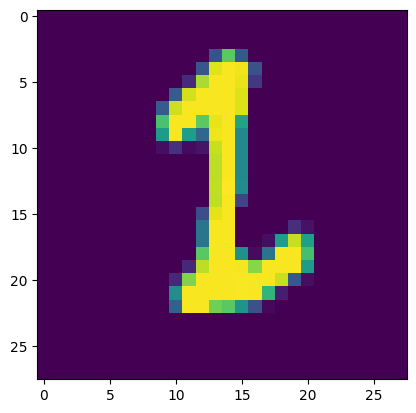

1


In [6]:
# displaying the image

plt.imshow(X_train[70])
plt.show()

# print the corresponding label
print(Y_train[70])

**Image Processing**

In [7]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [8]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


The images in the dataset are of the same size, image resizing is not required. The Labels can be One-Hot encoded or can be used as is.

In [9]:
# Data Scaling

X_train = X_train/255
X_test = X_test/255

In [12]:
# Printing the 10th image to confirm scaling

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Neural Network Design**

In [13]:
# Initializing the layers of the Neural  Network model

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [14]:
# Compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#Neural Net Training

model.fit(X_train, Y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2978 - accuracy: 0.9138
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1445 - accuracy: 0.9564
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1078 - accuracy: 0.9663
Epoch 4/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0879 - accuracy: 0.9738
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0713 - accuracy: 0.9783
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0610 - accuracy: 0.9804
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.9825
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0460 - accuracy: 0.9853
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0404 - accuracy: 0.9866
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.035

**Model Evaluation**

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1692 - accuracy: 0.9729
0.9728999733924866


Test Accuracy of Model = 97.29%

In [17]:
print(X_test.shape)

(10000, 28, 28)


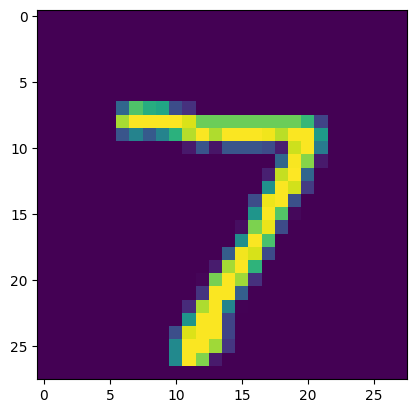

In [18]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [19]:
print(Y_test[0])

7


In [20]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
print(Y_pred.shape)

(10000, 10)


In [22]:
print(Y_pred[0])

[1.6847982e-09 5.2660258e-11 6.3383247e-08 7.2492498e-01 4.7744503e-10
 2.5562726e-06 7.7437376e-19 1.0000000e+00 9.6839331e-02 1.3637854e-01]


In [23]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [24]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

***Confusion Matrix***

In [25]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [26]:
print(conf_mat)

tf.Tensor(
[[ 968    1    1    1    1    0    2    3    3    0]
 [   0 1121    1    0    0    0    0    5    8    0]
 [   7   10  993    3    1    2    4    4    6    2]
 [   0    1    5  964    1    8    0    8   20    3]
 [   1    0    4    0  948    0    6    5    5   13]
 [   2    0    0    7    1  859    7    4   10    2]
 [   8    3    0    0    1   10  933    1    1    1]
 [   1    3    8    1    2    1    0 1002    4    6]
 [   7    0    1    1    2    4    2    4  951    2]
 [   3    5    0    3    5    3    1   11    7  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

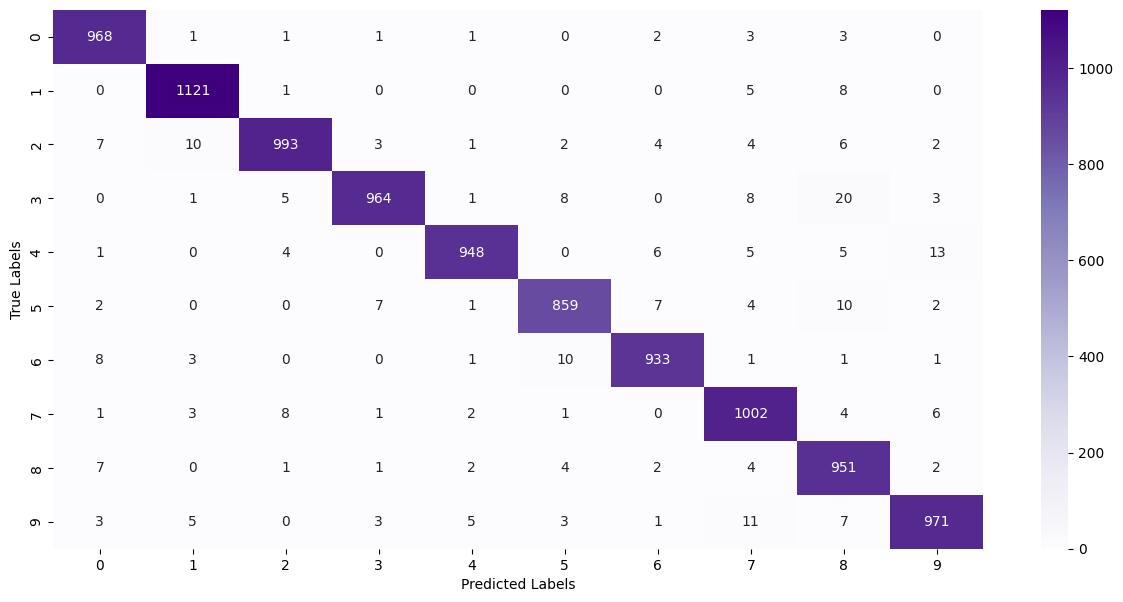

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')